# 1- Import libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

--------
# 2- Import dataset.

In [2]:
data = pd.read_csv('D://Cusromer Segmentation/Data/Mall_Customers.csv')

---------
# 3- Display first 5 rows of the dataset.

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


----------
# 4- Display last 5 rows of the dataset.

In [4]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


-----------
# 5- Find the shape of our dataset.

In [5]:
print('Number of rows = ',data.shape[0])
print('Number of columns = ',data.shape[1])

Number of rows =  200
Number of columns =  5


--------
# 6- Get more informations about our dataset.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


-----------
# 7- Get overall statistics of the dataset.

In [7]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


-------
# 8- Check null values in our dataset.

In [8]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

###### - No null values in our dataset.

------------
# 9- Kmeans clustering.

In [9]:
from sklearn.cluster import KMeans

In [10]:
X = data[['Annual Income (k$)','Spending Score (1-100)']]

In [11]:
kmeans = KMeans()

In [12]:
kmeans.fit(X)

KMeans()

In [14]:
kmeans.fit_predict(X)

array([4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 6, 6,
       4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 6, 6, 0, 0, 6, 6, 6, 6,
       6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 5, 3, 5, 3,
       0, 3, 5, 3, 5, 3, 5, 3, 5, 3, 0, 3, 5, 3, 0, 3, 5, 3, 5, 3, 5, 3,
       5, 3, 5, 3, 5, 3, 0, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3,
       5, 3, 5, 3, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7,
       2, 7])

-----------
# 10- Elbow method to find the best number of clusters.

In [17]:
wcss = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [18]:
wcss

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37233.81451071002,
 30227.60651315203,
 25018.576334776328,
 21826.936303231643,
 19657.783608703947,
 17556.600879214173,
 15838.717785514093,
 14490.481275571976,
 13038.986366574603,
 11668.281903622692,
 10870.875387830554,
 10265.97902930403,
 9519.661136575838,
 8800.4507062382]

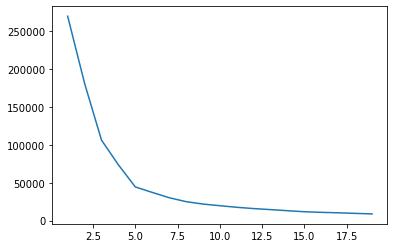

In [19]:
plt.plot(range(1,20),wcss)
plt.show()

###### - I see the best number of cluster is 5.

------------
# 11- Model training.

In [20]:
X = data[['Annual Income (k$)','Spending Score (1-100)']]

In [47]:
kmeans = KMeans(n_clusters=5,random_state=42)
y_means = kmeans.fit_predict(X)

In [48]:
y_means

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

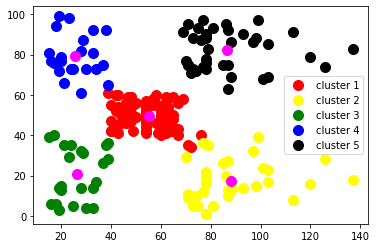

In [51]:
plt.scatter(X.iloc[y_means==0,0],X.iloc[y_means==0,1],s=100,c='red',label='cluster 1')
plt.scatter(X.iloc[y_means==1,0],X.iloc[y_means==1,1],s=100,c='yellow',label='cluster 2')
plt.scatter(X.iloc[y_means==2,0],X.iloc[y_means==2,1],s=100,c='green',label='cluster 3')
plt.scatter(X.iloc[y_means==3,0],X.iloc[y_means==3,1],s=100,c='blue',label='cluster 4')
plt.scatter(X.iloc[y_means==4,0],X.iloc[y_means==4,1],s=100,c='black',label='cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='magenta')
plt.legend()
plt.show()

In [57]:
kmeans.predict(pd.DataFrame({'Annual Income (k$)':15,'Spending Score (1-100)':39},index=[0]))

array([2])

---------------
# 12- Saving the model.

In [52]:
import joblib

In [53]:
joblib.dump(kmeans,'Customers_model')

['Customers_model']

In [54]:
model = joblib.load('Customers_model')

In [56]:
model.predict(pd.DataFrame({'Annual Income (k$)':15,'Spending Score (1-100)':39},index=[0]))

array([2])

---------
# 13- GUI.

In [59]:
from tkinter import *

In [62]:
def show_entry():
    p1 = int(e1.get())
    p2 = int(e2.get())
    model = joblib.load('Customers_model')
    df = pd.DataFrame({'Annual Income (k$)':p1,'Spending Score (1-100)':p2},index=[0])
    result = model.predict(df)
    if result[0] == 0:
        Label(master,text='Customer with medium annual income and medium Spending Score').grid(row=4)
    elif result[0] == 1:
        Label(master,text='Customer with high annual income and low Spending Score').grid(row=4)
    elif result[0] == 2:
        Label(master,text='Customer with low annual income and low Spending Score').grid(row=4)
    elif result[0] == 3:
        Label(master,text='Customer with low annual income and high Spending Score').grid(row=4)
    elif result[0] == 4:
        Label(master,text='Customer with high annual income and high Spending Score').grid(row=4)
        
master = Tk()
master.title('Customers Segmentation')
label = Label(master,text='Customers Segmentation',bg='blue',fg='white').grid(row=0,columnspan=2)

Label(master,text='Annual Income').grid(row=1)
Label(master,text='Spending Score').grid(row=2)

e1 = Entry(master)
e2 = Entry(master)

e1.grid(row=1,column=1)
e2.grid(row=2,column=1)

Button(master,text='Predict',command=show_entry).grid()
mainloop()